## Task # 14:
This is Task # 14 overall and Task 4 of week 6
## Task # 04:

- In this task we will be working with the titanic dataset

In [42]:
#importing necessary regular libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [20]:
#importing the titanic dataset from the local machine
fp = 'titanic.csv'
titanic_df = pd.read_csv(fp)

#check for columns with null values
print(titanic_df.columns[titanic_df.isnull().any()])

#a look at the dataset
titanic_df.head(3)

Index(['Age', 'Cabin', 'Embarked'], dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Pre Processing Of Data

#### Handling Null Values

In [21]:
#checking the null values percentage
nul_col = ['Age', 'Cabin', 'Embarked']
print(titanic_df[nul_col].isnull().sum()/titanic_df.shape[0]*100)

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64


In [22]:
#from the above we see that the Cabin column has more than 50% of Null/Missing values so lets drop this column

#creating the copy of original dataset
titanic_df1 = titanic_df.copy()

#dropping Cabin
titanic_df1.drop('Cabin',axis = 1,inplace = True)

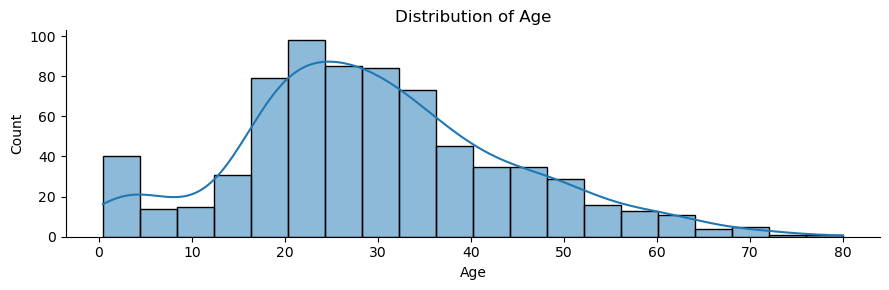

In [23]:
#now lets have a look at the distribution of the Age column 
sns.displot(titanic_df1['Age'],kde = True,height = 3,aspect = 3)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- Frome the above visualization we can obsereve that we have a skewed distribution , so we will be handlin the null values with the median

In [24]:
# Fill missing ages with the median age
titanic_df1['Age'] = titanic_df1['Age'].fillna(titanic_df1['Age'].median())

- The Embarked Column has categorical values and also it has very low percentage of Null values so if we drop the Null values , so it wont effect the dataset that much , also as a categorical value we can replace it with the Mode ,So its upto our choice but in this Task we will drop the rows containing Null values

In [25]:
#dropping the Null Value Rows
titanic_df1 = titanic_df1.dropna(subset=['Embarked'])

In [26]:
#verifying the dataset for Null Values
titanic_df1.columns[titanic_df1.isnull().any()]

Index([], dtype='object')

- As now we can see that we have no columns that contains the Null vales

#### Encoding

In [27]:
# now lets check the columns which contains the object datatype and are possible categorical columns
titanic_df1.select_dtypes(include=['object']).columns

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

- Name and Ticket cannot be categorical column , while Sex,and Embarked could be 

In [28]:
# Using One Hot Encoding
titanic_df1 = pd.get_dummies(titanic_df1,columns=['Embarked','Sex'],dtype='int32')

In [29]:
# lets have a look at the dataset to see that if our values are encoded or not
titanic_df1.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1,0


- So Encoding of SeX and Embarked column is completed

#### Data Standardization 
- Data Standardization is not necessary incase of logistic regression or decision trees but still it can be a good practice and in some scenarios can have a useful impact

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Here we will be standardizing the Age and Fare columns
std_col = ['Age','Fare']
titanic_df1[std_col] = scaler.fit_transform(titanic_df1[std_col])

In [31]:
# a look at the standard deviation
print(titanic_df1['Age'].std())
print(titanic_df1['Fare'].std())

1.000562904632249
1.0005629046322495


- As we can see that standard deviation is about 1 so our data has been standardized

#### 1) Evaluating Logistic Regression with Cross-Validation

In [32]:
# defining X and Y
X = titanic_df1.drop(['Survived','Name','Ticket'], axis=1)
y = titanic_df1["Survived"]

In [33]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Evaluating model using k-fold cross-validation
scores = cross_val_score(logreg, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Cross-validation accuracy:", scores.mean())

# Train test split
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Test accuracy (single train-test split):", logreg.score(X_test, y_test))

Cross-validation scores: [0.81818182 0.81690141 0.8028169  0.79577465 0.73943662]
Cross-validation accuracy: 0.7946222791293215
Test accuracy (single train-test split): 0.7752808988764045


#### Based on the output, we can see that:

- The cross-validation accuracy is 0.7946, which indicates that the model is performing well on average across the 5 folds.
- The test accuracy using a single train-test split is 0.7753, which is slightly lower than the cross-validation accuracy.
- This suggests that the model is overfitting slightly to the training data when using a single train-test split, whereas cross-validation helps to reduce overfitting by evaluating the model on multiple subsets of the data.

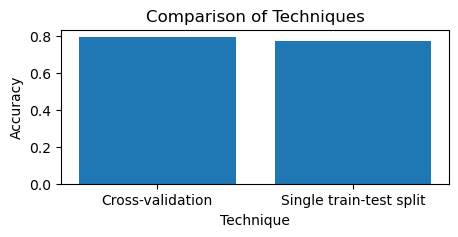

In [35]:
plt.figure(figsize=(5,2))
accuracies = [0.7946, 0.7753]
labels = ["Cross-validation", "Single train-test split"]

plt.bar(labels, accuracies)
plt.xlabel("Technique")
plt.ylabel("Accuracy")
plt.title("Comparison of Techniques")
plt.show()

#### 2) Analyzing Overfitting and Underfitting in Decision Trees

In [37]:
# defining X and Y
X = titanic_df1.drop(['Survived','Name','Ticket'], axis=1)
y = titanic_df1["Survived"]

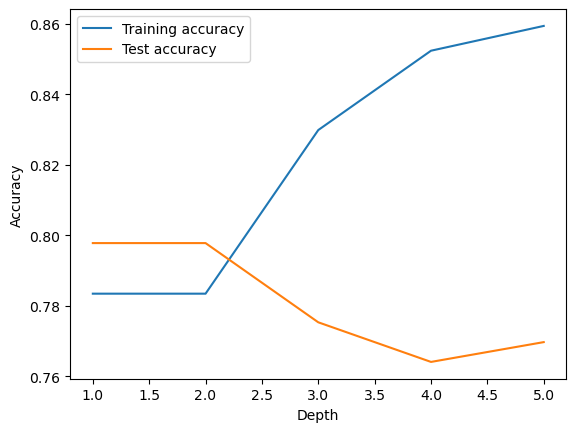

In [38]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating decision tree classifier with varying depths
from sklearn.tree import DecisionTreeClassifier

depths = [1, 2, 3, 4, 5]
train_acc = []
test_acc = []
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    train_acc.append(dt.score(X_train, y_train))
    test_acc.append(dt.score(X_test, y_test))

# Plot training and validation accuracies
plt.plot(depths, train_acc, label="Training accuracy")
plt.plot(depths, test_acc, label="Test accuracy")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##### From Above graph
The graph shows the accuracy of a decision tree model trained on different depths.
- We can see that the training accuracy increases as the depth increases. This makes sense as a deeper tree can better fit the training data.
- However, the test accuracy peaks at a depth of 2, and then decreases as the depth increases. This suggests that the deeper trees are overfitting the training data, and therefore performing worse on unseen data.

**This is a classic example of the bias-variance trade-off:**

- **Bias** refers to the error due to the model's assumptions. A simpler model with lower depth will have higher bias but lower variance.
- **Variance** refers to the error due to the model's sensitivity to the training data. A more complex model with higher depth will have lower bias but higher variance.
To find the optimal depth, we need to balance the bias and variance. In this case, a depth of 2 appears to be the optimal depth for this dataset, as it provides a good balance between the two.

#### 3) Calculating Precision, Recall, and F1-Score for Logistic Regression

In [39]:
# defining X and Y
X = titanic_df1.drop(['Survived','Name','Ticket'], axis=1)
y = titanic_df1["Survived"]

In [40]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)

# Train and prediction
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Calculating precision, recall, and F1-score
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.7821695492181642
Recall: 0.7752808988764045
F1-score: 0.7771572227474952


<details>
  <summary>Model Performance Metrics: Uncovering Insights into Your Model's Strengths and Weaknesses</summary>

  When it comes to evaluating the performance of a machine learning model, metrics play a crucial role in providing insights into its strengths and weaknesses. In this article, we'll delve into the world of precision, recall, and F1-score, and explore how these metrics can help you understand your model's performance.

  **Precision: A Measure of Accuracy**

  Precision measures the proportion of true positives among all positive predictions made by the model. A high precision indicates that the model is accurate when it predicts a positive outcome. In the context of our Titanic survival prediction model, a high precision means that the model is correct most of the time when it predicts that a passenger will survive.

  However, precision alone can be misleading. A model with high precision but low recall might be accurate only for a small subset of the data, while misclassifying a large number of instances. This is where recall comes into play.

  **Recall: A Measure of Completeness**

  Recall measures the proportion of actual positive instances that the model correctly identifies. A high recall indicates that the model is able to detect most of the actual positive instances. In our Titanic survival prediction model, a high recall means that the model is able to identify most of the passengers who actually survived.

  While recall provides a more comprehensive view of the model's performance, it's not without its limitations. A model with high recall but low precision might be detecting many true positives, but also incorrectly classifying many negative instances as positive.

  **F1-score: A Balanced Measure of Performance**

  The F1-score, also known as the F1-measure or F-score, provides a balanced measure of both precision and recall. It's the harmonic mean of precision and recall, and it gives a more comprehensive view of the model's performance. A high F1-score indicates that the model is performing well in terms of both precision and recall.

  In our example, the F1-score of 0.7772 suggests that the model is performing reasonably well, but there's still room for improvement. By examining the precision and recall values, we can identify areas where the model needs improvement.

  **Analysis:**

  - **Precision: 0.7822** - This indicates that out of all the positive predictions made by the model, about 78.22% are actually true positives. In other words, the model is correct about 78.22% of the time when it predicts a passenger will survive.
  - **Recall: 0.7753** - This indicates that out of all the actual positive instances (i.e., passengers who survived), the model is able to detect about 77.53% of them. In other words, the model is able to identify about 77.53% of the passengers who actually survived.
  - **F1-score: 0.7772** - This is the harmonic mean of precision and recall, and it provides a balanced measure of both. An F1-score of 0.7772 indicates that the model is performing reasonably well, but there's still room for improvement.

  **Interpretation:**

  Based on these metrics, we can conclude that the model is performing fairly well, but it's not perfect. The precision and recall values are close, indicating that the model is not biased towards either false positives or false negatives.

  However, there's still a trade-off between precision and recall. If we want to increase the precision, we might need to sacrifice some recall, and vice versa. Depending on the specific problem and requirements, we might need to adjust the model's hyperparameters or try different techniques to improve its performance.
</details>

#### 4) ROC Curve Analysis for Decision Trees

In [41]:
# defining X and Y
X = titanic_df1.drop(['Survived','Name','Ticket'], axis=1)
y = titanic_df1["Survived"]

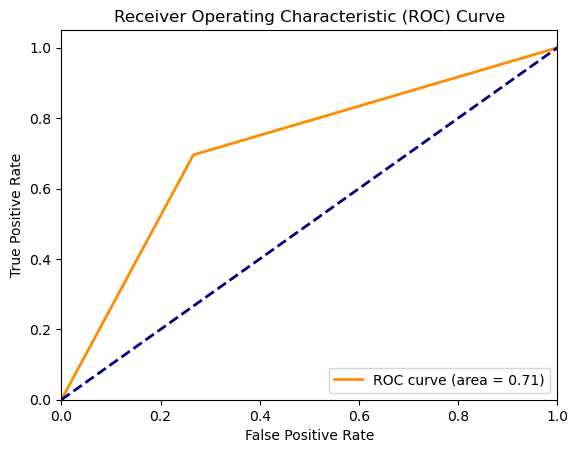

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc



# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# decision tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = dt_clf.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# the AUC
auc_value = auc(fpr, tpr)

# Plot
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_value)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<details>
  <summary>Model Performance Metrics: Uncovering Insights into Your Model's Strengths and Weaknesses</summary>

  - The plot shows the Receiver Operating Characteristic (ROC) curve for a binary classification model. The ROC curve is a graphical representation of the performance of a classification model at all classification thresholds. The x-axis represents the false positive rate (FPR), which is the proportion of negative samples that are incorrectly classified as positive. The y-axis represents the true positive rate (TPR), which is the proportion of positive samples that are correctly classified as positive.

  - The blue dashed line represents the random chance line, which indicates that the model is performing at the level of random guessing. The orange line represents the ROC curve of the model. The area under the ROC curve (AUC) is a measure of the overall performance of the model. A higher AUC indicates better performance. In this case, the AUC is 0.71, which is a decent score.

  - The ROC curve shows that the model has a good ability to distinguish between positive and negative samples. The curve is above the random chance line, indicating that the model is better than random guessing. However, there is room for improvement, as the curve is not perfectly close to the top left corner.

</details>


In [45]:
# defining X and Y
X = titanic_df1.drop(['Survived','Name','Ticket'], axis=1)
y = titanic_df1["Survived"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

# Logistic Regression without cross-validation
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Logistic Regression with cross-validation
lr_cv = LogisticRegression(max_iter=1000)
scores_lr_cv = cross_val_score(lr_cv, X_train, y_train, cv=5)


In [49]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

# Decision Tree without cross-validation
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Decision Tree with cross-validation
dt_cv = DecisionTreeClassifier()
scores_dt_cv = cross_val_score(dt_cv, X_train, y_train, cv=5)

In [53]:
#Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
# Evaluation metrics
metrics = {
    "Model": ["Logistic Regression (without CV)", "Logistic Regression (with CV)", "Decision Tree (without CV)", "Decision Tree (with CV)"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        scores_lr_cv.mean(),
        accuracy_score(y_test, y_pred_dt),
        scores_dt_cv.mean()
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        scores_lr_cv.mean(),
        precision_score(y_test, y_pred_dt),
        scores_dt_cv.mean()
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        scores_lr_cv.mean(),
        recall_score(y_test, y_pred_dt),
        scores_dt_cv.mean()
    ]
}

# Converting it  intto DataFrame
df_metrics = pd.DataFrame(metrics)
df_metrics

,Model,Accuracy,Precision,Recall
0,Logistic Regression (without CV),0.775281,0.688312,0.768116
1,Logistic Regression (with CV),0.794622,0.794622,0.794622
2,Decision Tree (without CV),0.702247,0.597561,0.710145
3,Decision Tree (with CV),0.739831,0.739831,0.739831


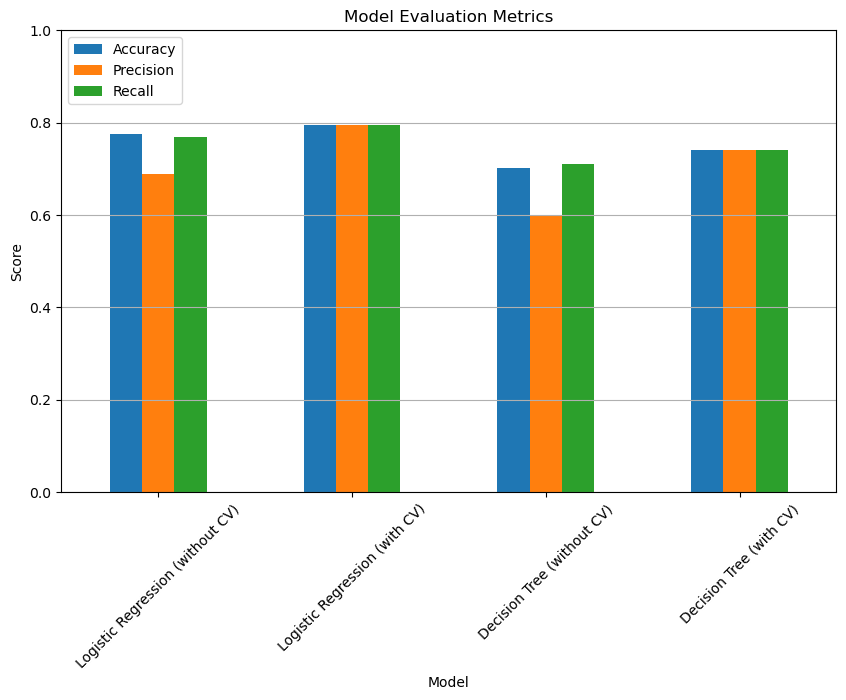

In [54]:
# Plotting the metrics
df_metrics.set_index("Model").plot(kind="bar", figsize=(10, 6))
plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(loc="upper left")
plt.grid(axis="y")
plt.show()